In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from itertools import cycle
import matplotlib.gridspec as gridspec

In [4]:
x = (np.array([1,2,3]))
print(type(x))

<class 'numpy.ndarray'>


This notebook is used to make the plots for Rosalind's presentation.  Firstly, a comparison between the effects of N* = 0.7 and 1.17, similar to the 
stochastic versions of fig 4c and 4d from the bftt paper

In [2]:
max_gRate = 0.083 #max growth rate of the bacteria
K = 1000 #carrying capacity for the regular simulations
big_K = 10000 #carring capacity for the big_K simulations
duration_fig4 = 100. #duration of the simulations used for the figure 4 plots

In [3]:
def readDeterministicData(filepath):
    '''
    method to read in Chris' deterministic data into pandas dataframe.
    Need to set delimiter to space, and also deal with the leading whitespace in the 1st column which produces a column of NaNs
    '''
    df = pd.read_csv(filepath, sep=" ", header=None, names=["blank", 't', 'N_edge', 'N'])
    df = df.drop(columns=['blank'])
    #truncate the data so that it's for the same duration as the stochastic ones
    return df[df['t'] < duration_fig4*max_gRate]

In [4]:
#both parameter sets use the same set of immigration rates
#the 4c sets are for N* = 1.17, 4d is N* = 0.7
r_imm = [0.4, 0.5, 0.6, 0.7]

#these are the ones used to make the second batch of plots for the paper, the corresponding colour map ones
#this is what all the _v2 variables refer to
r_imm_v2 = [0.55, 0.6, 0.65]

#N* = 1.17
fig4c_rImm_0_4 = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_4-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4c_rImm_0_5 = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_5-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4c_rImm_0_55 = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_55-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4c_rImm_0_6 = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_6-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4c_rImm_0_65 = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_65-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4c_rImm_0_7 = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_7-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4c_pops = [fig4c_rImm_0_4, fig4c_rImm_0_5, fig4c_rImm_0_6, fig4c_rImm_0_7]
fig4c_pops_v2 = [fig4c_rImm_0_55, fig4c_rImm_0_6, fig4c_rImm_0_65]

#N* = 0.7
fig4d_rImm_0_4 = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_4-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4d_rImm_0_5 = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_5-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4d_rImm_0_55 = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_55-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4d_rImm_0_6 = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_6-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4d_rImm_0_65 = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_65-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4d_rImm_0_7 = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_7-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4d_pops = [fig4d_rImm_0_4, fig4d_rImm_0_5, fig4d_rImm_0_6, fig4d_rImm_0_7]
fig4d_pops_v2 = [fig4d_rImm_0_55, fig4d_rImm_0_6, fig4d_rImm_0_65]

#N* = 0.9
fig4e_rImm_0_4 = pd.read_csv("allen_presentation_bigK/ratios4e_rImmig_0_4-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4e_rImm_0_5 = pd.read_csv("allen_presentation_bigK/ratios4e_rImmig_0_5-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4e_rImm_0_6 = pd.read_csv("allen_presentation_bigK/ratios4e_rImmig_0_6-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4e_rImm_0_7 = pd.read_csv("allen_presentation_bigK/ratios4e_rImmig_0_7-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4e_pops = [fig4e_rImm_0_4, fig4e_rImm_0_5, fig4e_rImm_0_6, fig4e_rImm_0_7]


#microhab times
fig4c_rImm_0_4_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_4-stochastic_microhabs_over_time.csv")
fig4c_rImm_0_5_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_5-stochastic_microhabs_over_time.csv")
fig4c_rImm_0_6_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_6-stochastic_microhabs_over_time.csv")
fig4c_rImm_0_7_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4c_rImmig_0_7-stochastic_microhabs_over_time.csv")
fig4c_mh_times = [fig4c_rImm_0_4_mhTimes, fig4c_rImm_0_5_mhTimes, fig4c_rImm_0_6_mhTimes, fig4c_rImm_0_7_mhTimes]
for mh_t in fig4c_mh_times:
    mh_t['avg_mh_t'] = mh_t.mean(axis=1)

fig4d_rImm_0_4_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_4-stochastic_microhabs_over_time.csv")
fig4d_rImm_0_5_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_5-stochastic_microhabs_over_time.csv")
fig4d_rImm_0_6_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_6-stochastic_microhabs_over_time.csv")
fig4d_rImm_0_7_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4d_rImmig_0_7-stochastic_microhabs_over_time.csv")
fig4d_mh_times = [fig4d_rImm_0_4_mhTimes, fig4d_rImm_0_5_mhTimes, fig4d_rImm_0_6_mhTimes, fig4d_rImm_0_7_mhTimes]
for mh_t in fig4d_mh_times:
    mh_t['avg_mh_t'] = mh_t.mean(axis=1)
    
fig4e_rImm_0_4_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4e_rImmig_0_4-stochastic_microhabs_over_time.csv")
fig4e_rImm_0_5_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4e_rImmig_0_5-stochastic_microhabs_over_time.csv")
fig4e_rImm_0_6_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4e_rImmig_0_6-stochastic_microhabs_over_time.csv")
fig4e_rImm_0_7_mhTimes = pd.read_csv("allen_presentation_bigK/ratios4e_rImmig_0_7-stochastic_microhabs_over_time.csv")
fig4e_mh_times = [fig4e_rImm_0_4_mhTimes, fig4e_rImm_0_5_mhTimes, fig4e_rImm_0_6_mhTimes, fig4e_rImm_0_7_mhTimes]
for mh_t in fig4e_mh_times:
    mh_t['avg_mh_t'] = mh_t.mean(axis=1)

    
#deterministic data 
#fig4c - N* = 1.17 
fig4c_rImm_0_4_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.4_ns1.17.dat')
fig4c_rImm_0_5_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.5_ns1.17.dat')
fig4c_rImm_0_55_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.55_ns1.17.dat')
fig4c_rImm_0_6_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.6_ns1.17.dat')
fig4c_rImm_0_65_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.65_ns1.17.dat')
fig4c_rImm_0_7_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.7_ns1.17.dat')
fig4c_pops_deterministic = [fig4c_rImm_0_4_deterministic, fig4c_rImm_0_5_deterministic, fig4c_rImm_0_6_deterministic, fig4c_rImm_0_7_deterministic]
fig4c_pops_deterministic_v2 = [fig4c_rImm_0_55_deterministic, fig4c_rImm_0_6_deterministic, fig4c_rImm_0_65_deterministic]

#fig4d - N* = 0.7 
fig4d_rImm_0_4_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.4_ns0.7.dat')
fig4d_rImm_0_5_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.5_ns0.7.dat')
fig4d_rImm_0_55_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.55_ns0.7.dat')
fig4d_rImm_0_6_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.6_ns0.7.dat')
fig4d_rImm_0_65_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.65_ns0.7.dat')
fig4d_rImm_0_7_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.7_ns0.7.dat')
fig4d_pops_deterministic = [fig4d_rImm_0_4_deterministic, fig4d_rImm_0_5_deterministic, fig4d_rImm_0_6_deterministic, fig4d_rImm_0_7_deterministic]
fig4d_pops_deterministic_v2 = [fig4d_rImm_0_55_deterministic, fig4d_rImm_0_6_deterministic, fig4d_rImm_0_65_deterministic]

#fig4e - N* = 0.9 
fig4e_rImm_0_4_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.4_ns0.9.dat')
fig4e_rImm_0_5_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.5_ns0.9.dat')
fig4e_rImm_0_6_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.6_ns0.9.dat')
fig4e_rImm_0_7_deterministic = readDeterministicData('chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.7_ns0.9.dat')
fig4e_pops_deterministic = [fig4e_rImm_0_4_deterministic, fig4e_rImm_0_5_deterministic, fig4e_rImm_0_6_deterministic, fig4e_rImm_0_7_deterministic]



In [5]:
def plotQuartetOfPopSizes(pops, pops_deterministic, r_imms, N_thresh, K_val):
    #here we'll plot the stochastic pops over time in a nicer looking format
    fig, axs = plt.subplots(2,2, figsize=(8,7), dpi=220, sharex=True, sharey=True)
    plt.rcParams['font.sans-serif'] = "Arial"
    K_val = 10000
    i = 0
    letters = ['a', 'b', 'c', 'd']

    for ax in axs.flat:

        pop_dataset = pops[i]
        #deterministic_pops = deterministicPops_4c_list[i]

        #print(type(pop_dataset))
        nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column
        colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
        #allows us to alternate line styles for the different runs
        lines = ["-","--","-.",":"]
        linecycler = cycle(lines[::-1])
        for p in range(nCols):

            #ax.plot(pop_dataset['t']*max_gRate, pop_dataset[str(p)]/K_val, lw=2.2, color=colors[p], ls=next(linecycler))
            ax.plot(pop_dataset['t'][:-1]*max_gRate, pd.to_numeric(pop_dataset[str(p)][:-1])/K_val, lw=2.2, color=colors[p], ls=next(linecycler))
        #ax.plot(deterministic_pops['t'], deterministic_pops['N'], ls="-.", lw=2.2, color='#ff0066')
        ax.plot(pops_deterministic[i]['t'], pops_deterministic[i]['N'], ls="-.", lw=2.05, color='#ff0066')
        #print(len(mh_times[i]['avg_mh_t']))
        #mh_times_y = [N_thresh*(j+1) for j in range(len(mh_times[i]['avg_mh_t']))]
        #ax.scatter(mh_times[i]['avg_mh_t'][:]*max_gRate, mh_times_y[:], lw=4, edgecolors='k')
        
        ax.set_title("$N^*/K = $"+str(N_thresh)+"$, \;\;$ r$_{\\rm im} = $"+str(r_imms[i]), fontsize = 20)
        ax.tick_params(axis='both', which='major', labelsize=24)
        ax.annotate("("+letters[i]+")", xy=(0.02, 0.975), xycoords='axes fraction', fontsize=22, horizontalalignment='left', verticalalignment='top')

        i = i+1

    fig = plt.gcf()
    #fig.suptitle("Title centered above all subplots", fontsize=24)

    fig.add_subplot(111, frame_on=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)
    plt.xlabel("t/g$_{\max}$", fontsize=24)
    plt.ylabel("N/K", fontsize=24)


    plt.tight_layout()
    fig.subplots_adjust(top=0.9)
    plt.savefig('allen_plots/N_thresh_'+str(N_thresh)+'.pdf', bbox_inches="tight")
    plt.show()


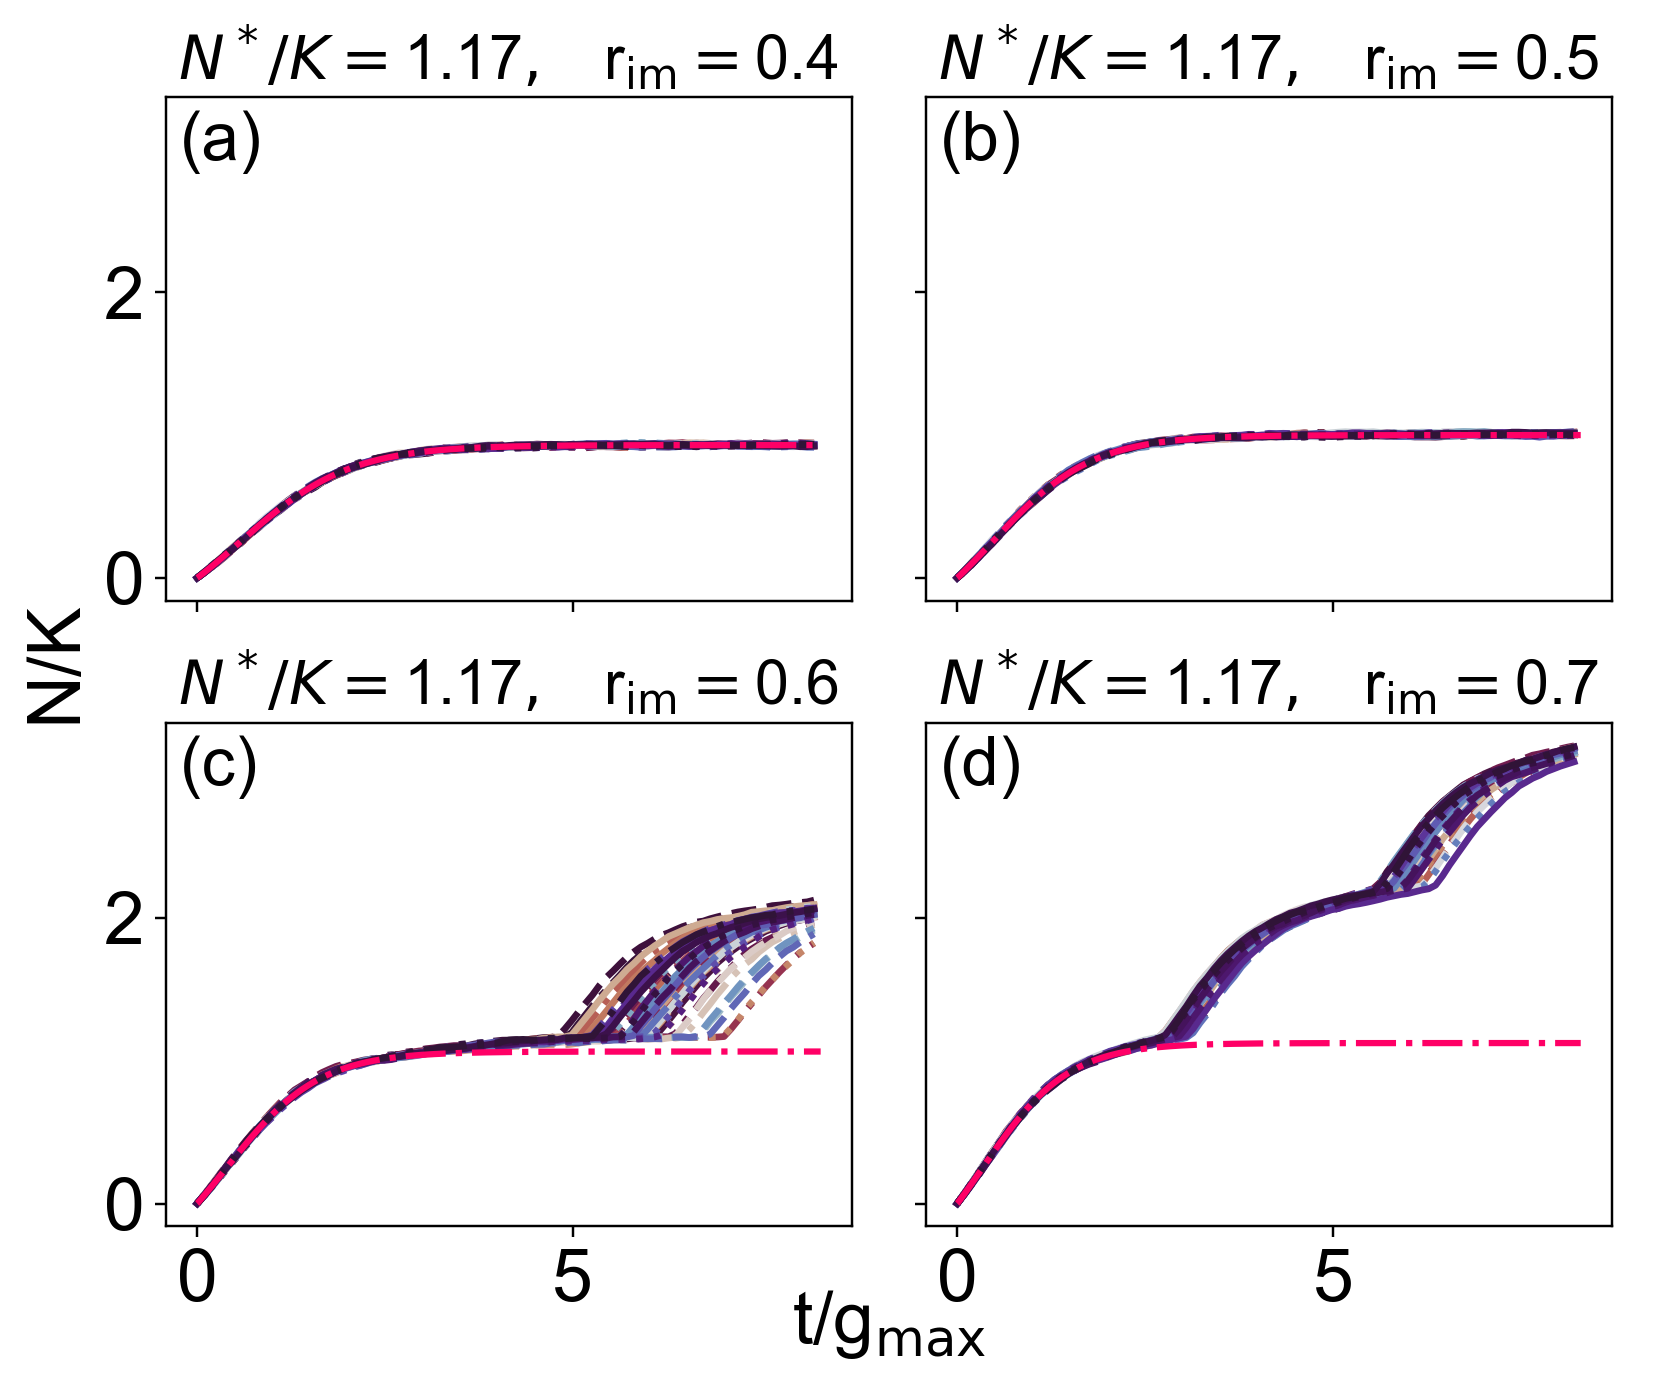

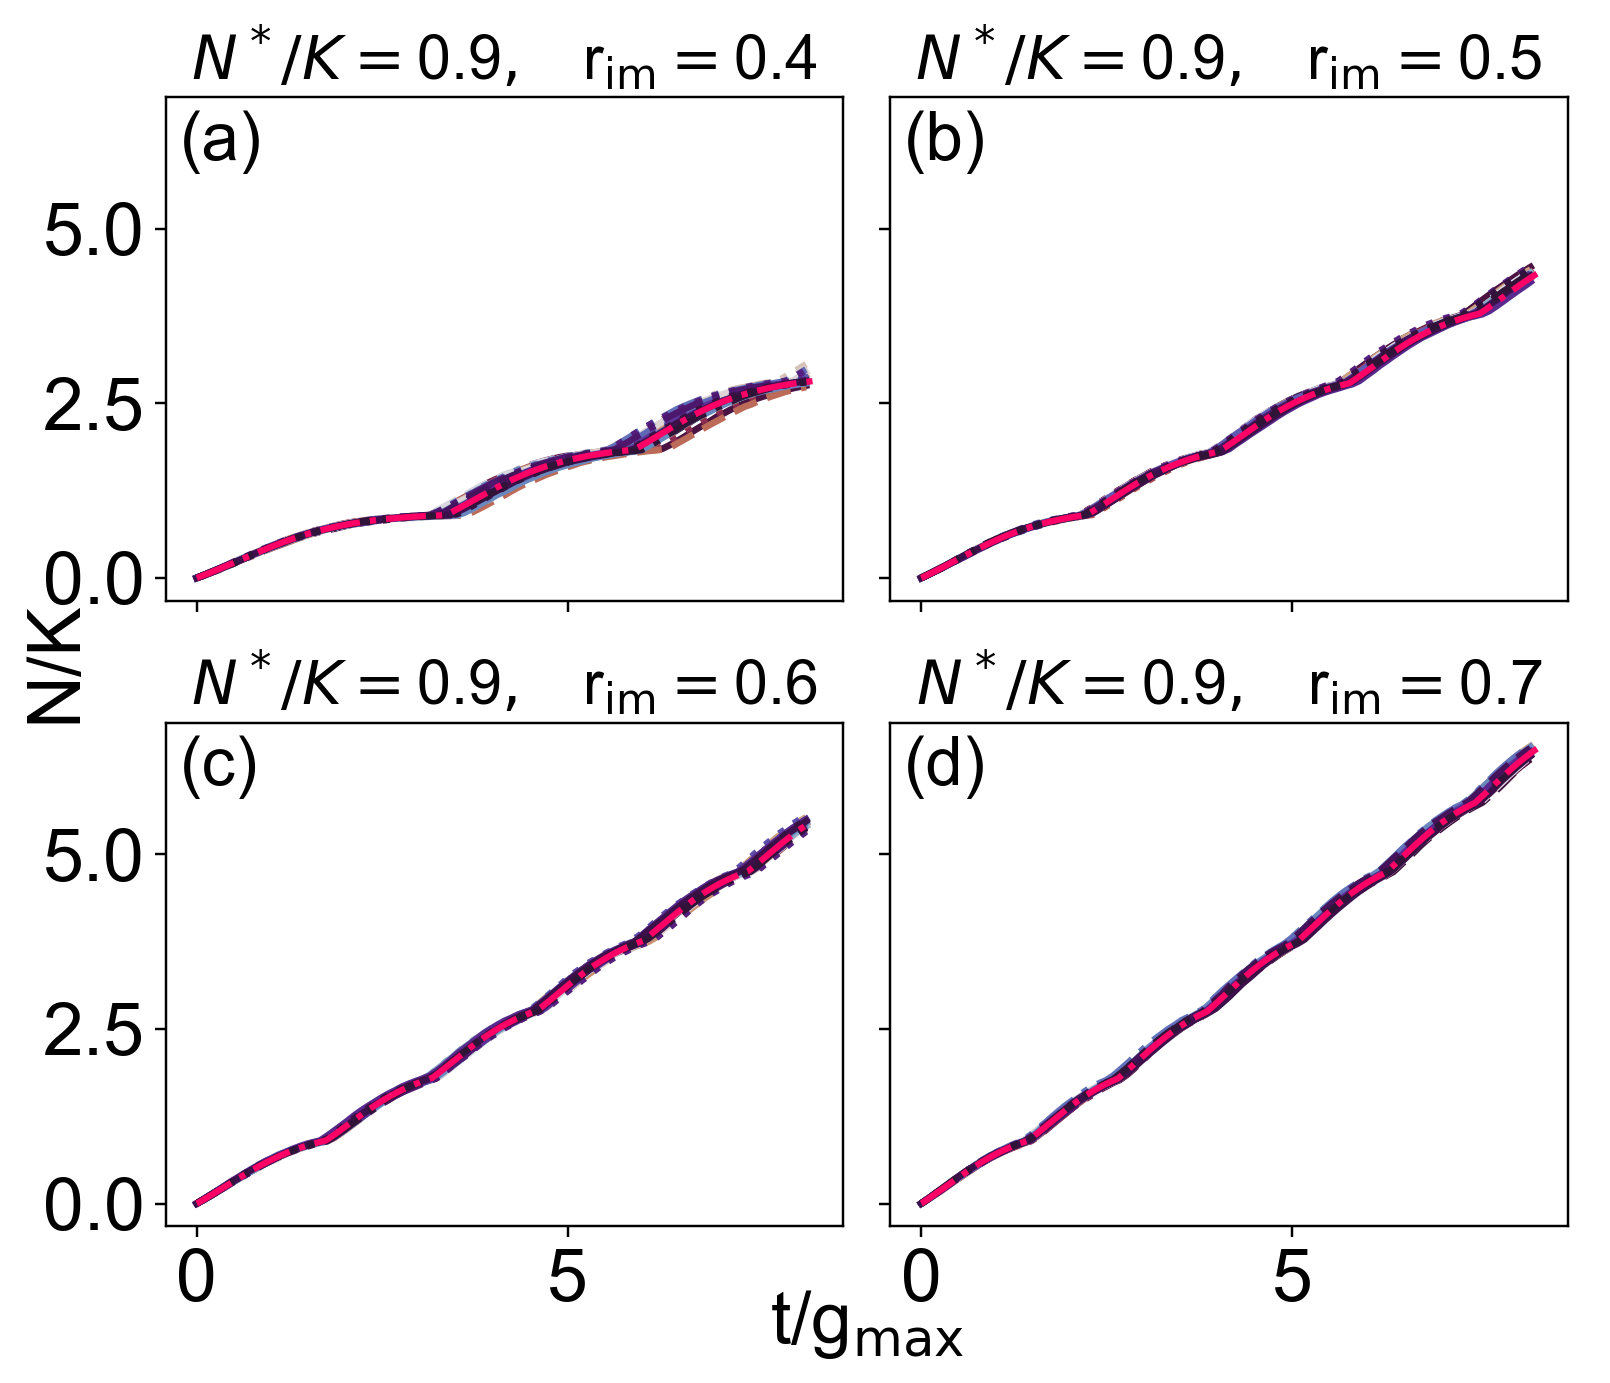

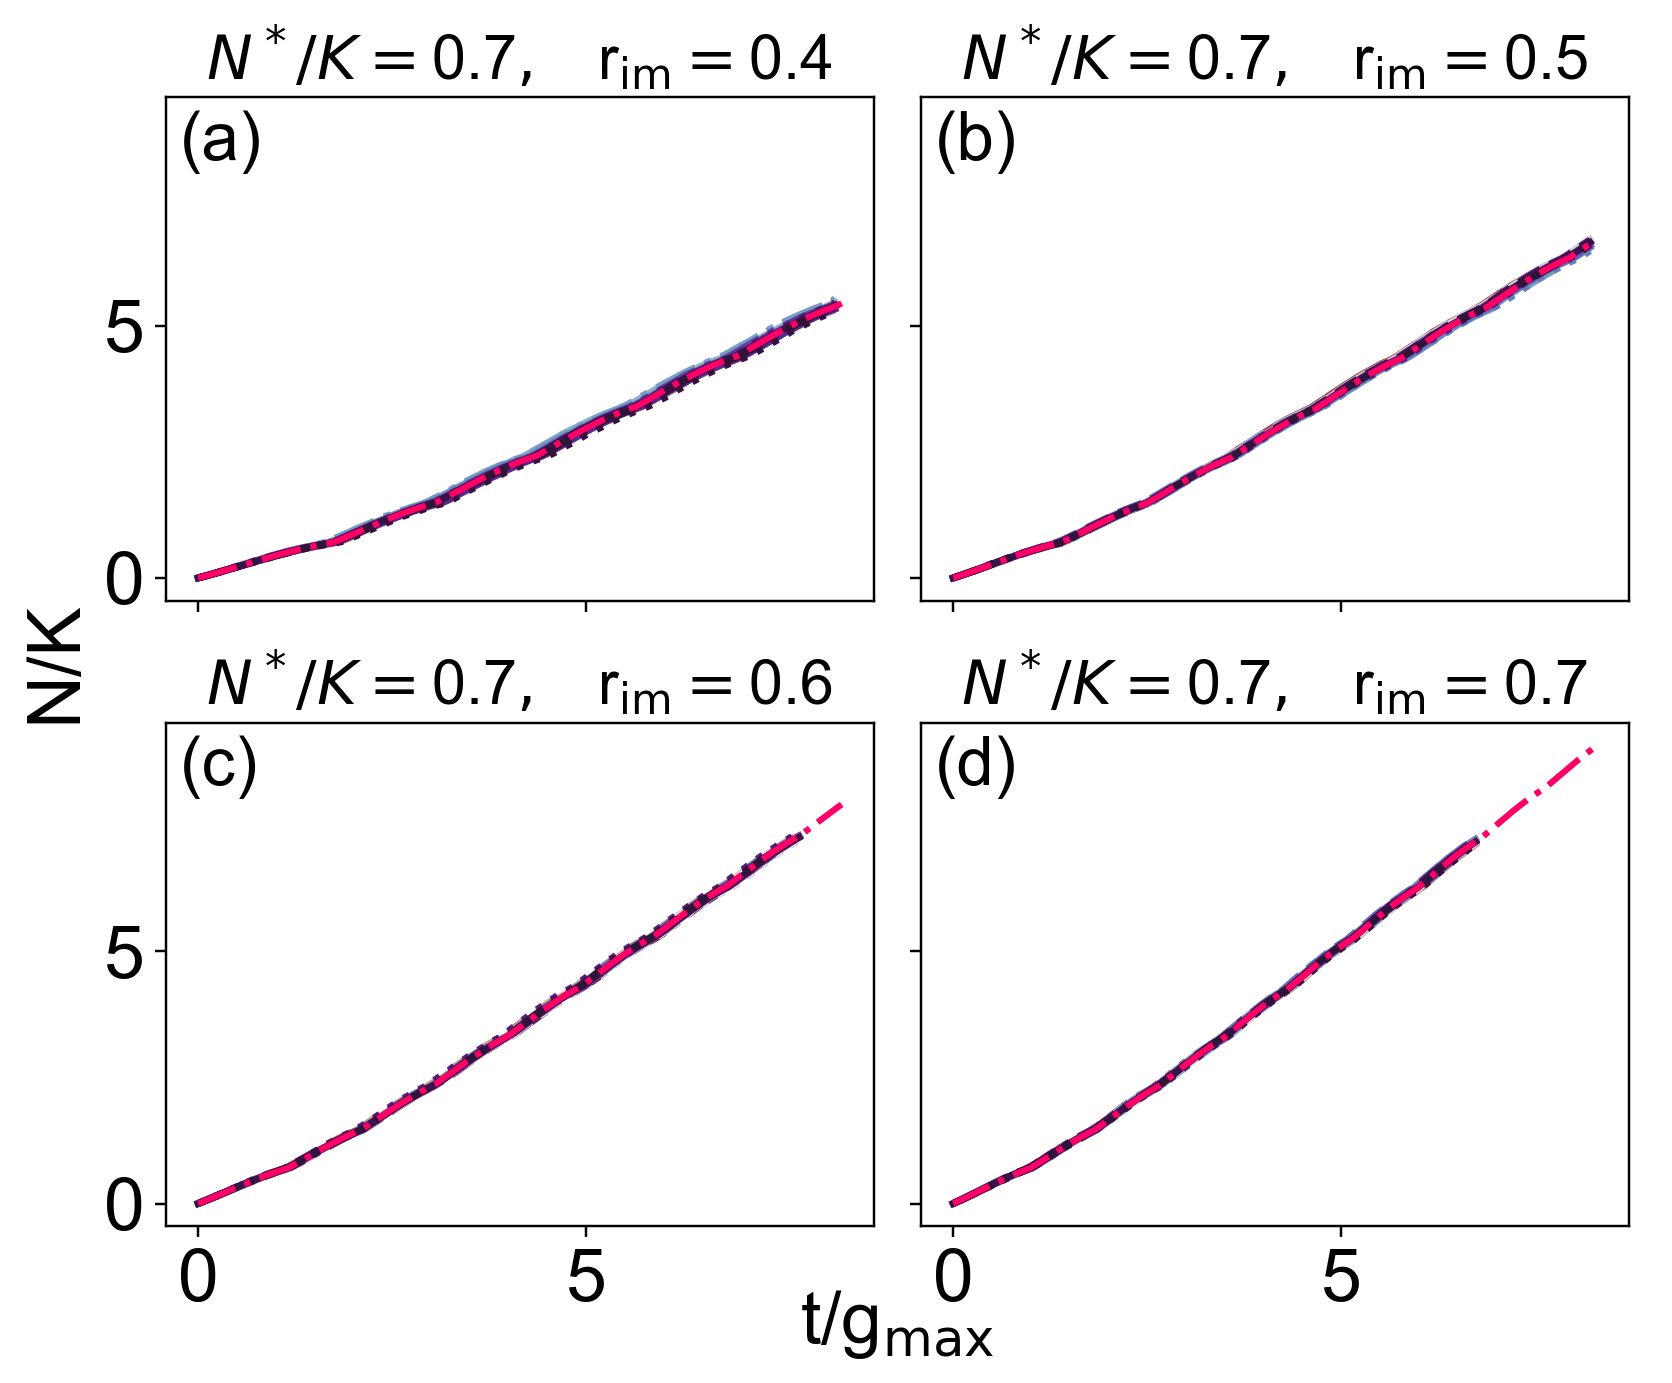

In [6]:
plotQuartetOfPopSizes(fig4c_pops, fig4c_pops_deterministic, r_imm, 1.17, big_K)
plotQuartetOfPopSizes(fig4e_pops, fig4e_pops_deterministic, r_imm, 0.9, big_K)
plotQuartetOfPopSizes(fig4d_pops, fig4d_pops_deterministic, r_imm, 0.7, big_K)

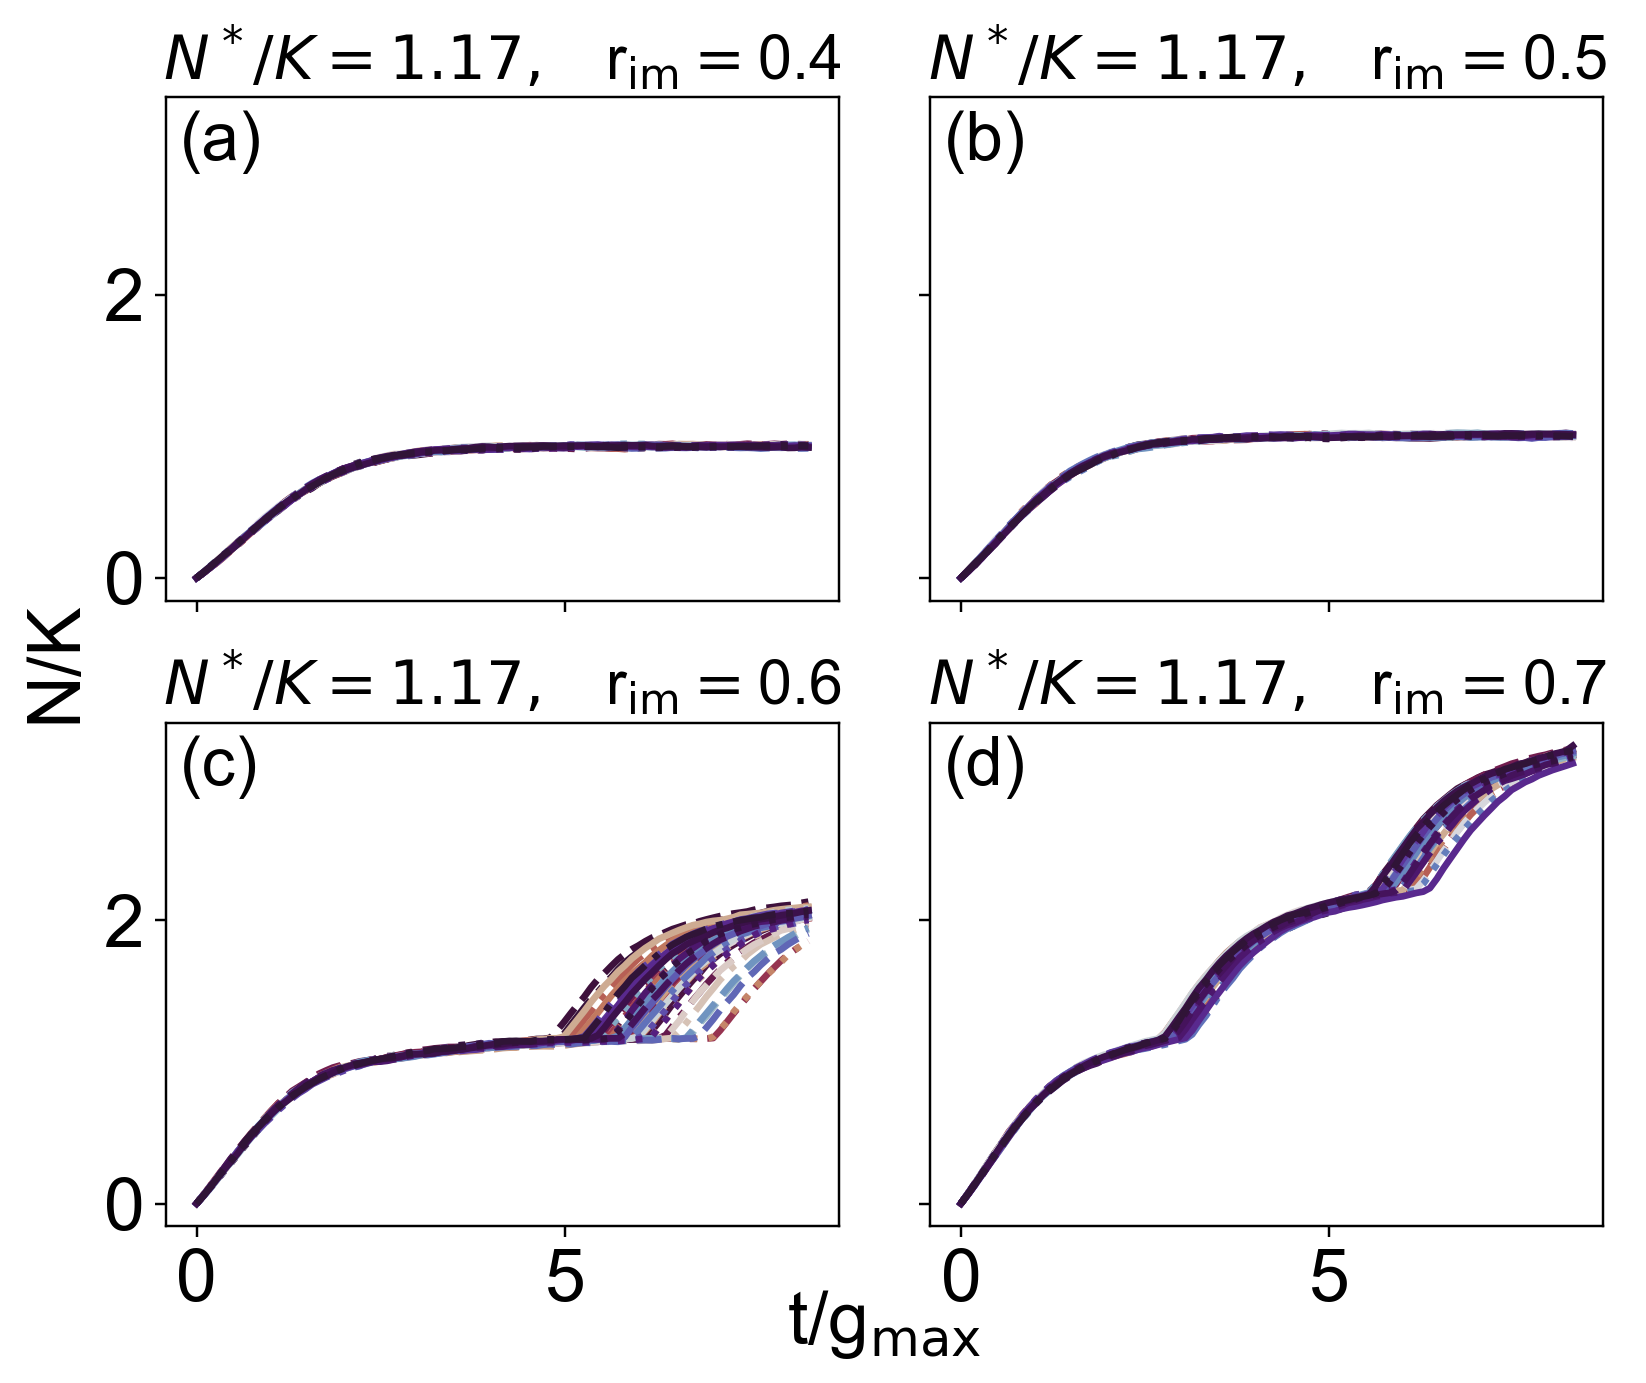

In [7]:
#here we'll plot the stochastic pops over time in a nicer looking format
#this one is for figure 4c
fig, axs = plt.subplots(2,2, figsize=(8,7), dpi=220, sharex=True, sharey=True)
plt.rcParams['font.sans-serif'] = "Arial"
K_val = 10000
i = 0
letters = ['a', 'b', 'c', 'd']

for ax in axs.flat:

    pop_dataset = fig4c_pops[i]
    #deterministic_pops = deterministicPops_4c_list[i]
    
    #print(type(pop_dataset))
    nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column
    colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
    #allows us to alternate line styles for the different runs
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines[::-1])
    for p in range(nCols):

        ax.plot(pop_dataset['t']*max_gRate, pop_dataset[str(p)]/K_val, lw=2.2, color=colors[p], ls=next(linecycler))
        
    #ax.plot(deterministic_pops['t'], deterministic_pops['N'], ls="-.", lw=2.2, color='#ff0066')
    
    
    ax.set_title("$N^*/K = 1.17, \;\;$ r$_{\\rm im} = $"+str(r_imm[i]), fontsize = 20)
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.annotate("("+letters[i]+")", xy=(0.02, 0.975), xycoords='axes fraction', fontsize=22, horizontalalignment='left', verticalalignment='top')
    
    i = i+1

fig = plt.gcf()
#fig.suptitle("Title centered above all subplots", fontsize=24)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("t/g$_{\max}$", fontsize=24)
plt.ylabel("N/K", fontsize=24)


plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig('allen_plots/N_thresh_1.17.pdf', bbox_inches="tight")
plt.show()

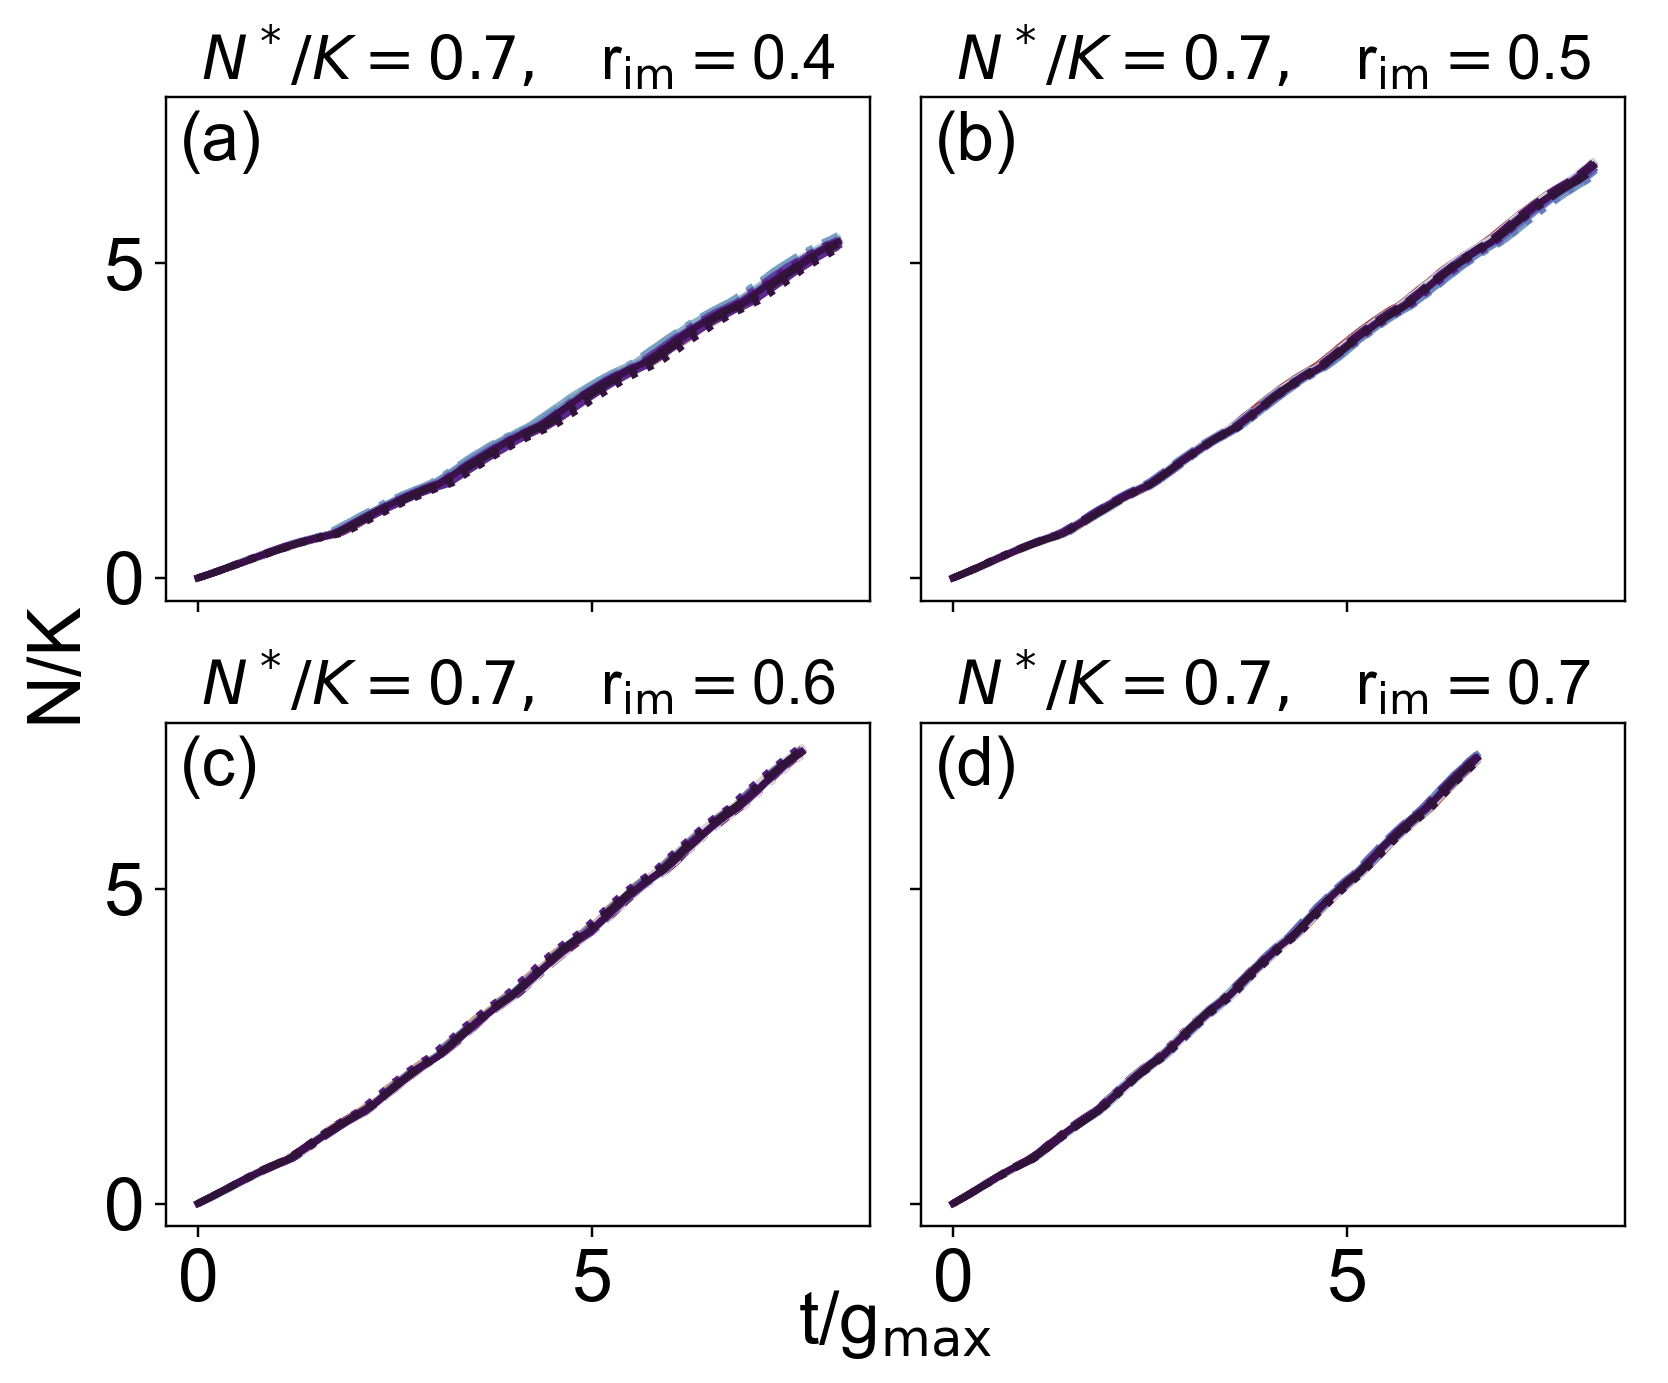

In [8]:
#here we'll plot the stochastic pops over time in a nicer looking format
#this one is for figure 4d
fig, axs = plt.subplots(2,2, figsize=(8,7), dpi=220, sharex=True, sharey=True)
plt.rcParams['font.sans-serif'] = "Arial"
K_val = 10000
i = 0
letters = ['a', 'b', 'c', 'd']

for ax in axs.flat:

    pop_dataset = fig4d_pops[i]
    #deterministic_pops = deterministicPops_4c_list[i]
    
    #print(type(pop_dataset))
    nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column
    colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
    #allows us to alternate line styles for the different runs
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines[::-1])
    for p in range(nCols):
        #print((pop_dataset[str(p)][:-2]))
        ax.plot(pop_dataset['t'][:-2]*max_gRate, pd.to_numeric(pop_dataset[str(p)][:-2])/K_val, lw=2.2, color=colors[p], ls=next(linecycler))
        
    #ax.plot(deterministic_pops['t'], deterministic_pops['N'], ls="-.", lw=2.2, color='#ff0066')
    
    
    ax.set_title("$N^*/K = 0.7, \;\;$ r$_{\\rm im} = $"+str(r_imm[i]), fontsize = 20)
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.annotate("("+letters[i]+")", xy=(0.02, 0.975), xycoords='axes fraction', fontsize=22, horizontalalignment='left', verticalalignment='top')
    
    i = i+1

fig = plt.gcf()
#fig.suptitle("Title centered above all subplots", fontsize=24)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("t/g$_{\max}$", fontsize=24)
plt.ylabel("N/K", fontsize=24)


plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig('allen_plots/N_thresh_0.7.pdf', bbox_inches="tight")
plt.show()

In [15]:
def compareNThresh(r_imms, pops4c, pops4d, pops4c_deterministic, pops4d_deterministic):
    
    fig, axs = plt.subplots(2,2, figsize=(7.6,6), dpi=220, sharex=True, sharey=True)
    plt.rcParams['font.sans-serif'] = "Arial"
    K_val = 10000
    i = 0
    letters = ['a', 'b', 'c', 'd']
    N_threshs = [1.17, 0.7]
    pop_datasets = [pops4c, pops4d]
    pop_datasets_deterministic = [pops4c_deterministic, pops4d_deterministic]
    colourmaps = [pl.cm.RdPu, pl.cm.summer_r, pl.cm.Blues]
    colors_deterministic = ["#9900cc", "#29a329", "#3333ff"]
    lines = ["-","--","-.",":"]

    for ax in axs.flat:
        
        if not i % 2:
#             for r_imm, pop_dataset, c_map, deterministic_pops, color_det in zip(r_imms, pop_datasets[i], colourmaps, pop_datasets_deterministic[i], colors_deterministic):
            for r_imm, pop_dataset, c_map in zip(r_imms, pop_datasets[i//2], colourmaps):

                nCols = len(pop_dataset.columns) - 1
                colors = c_map(np.linspace(0, 1, nCols))
                linecycler = cycle(lines[::-1])

                pop_dataset=pop_dataset.dropna()

                for p in range(nCols):
                    
                    pop_dataset_num = pd.to_numeric(pop_dataset[str(p)], errors='coerce')
                    ax.plot(pop_dataset['t']*max_gRate, pop_dataset_num/K_val, lw=2.2, color=colors[p], ls=next(linecycler), label=r_imm)
#                     ax.plot(deterministic_pops['t'], deterministic_pops['N'], ls="-.", lw=2., color=color_det)
            
            #removes the ticks from the plots
            #ax.set_xticklabels([])
            #ax.set_yticklabels([])
        
        else:
            for deterministic_pops, color_det, r_imm in zip(pop_datasets_deterministic[i//2], colors_deterministic, r_imms):
                ax.plot(deterministic_pops['t'], deterministic_pops['N'], lw=2.2, color=color_det, label=r_imm)
                
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles[::-1], labels[::-1], title=r'$r_{\rm im}/Kg$')
            #ax.legend()
        
        ax.tick_params(axis='both', which='major', labelsize=24)
        ax.set_ylim(0, 3.1)
        ax.set_xlim(0,8.1)
        ax.annotate("("+letters[i]+")", xy=(0.02, 0.975), xycoords='axes fraction', fontsize=22, horizontalalignment='left', verticalalignment='top')
        ax.set_title("$N^*/K = $"+str(N_threshs[i//2]), fontsize = 20)
        
        i = i+1


    fig = plt.gcf()
    #fig.suptitle("Title centered above all subplots", fontsize=24)

    fig.add_subplot(111, frame_on=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)
    plt.xlabel("t/g$_{\max}$", fontsize=24)
    plt.ylabel("N/K", fontsize=24)

    plt.tight_layout()
    fig.subplots_adjust(top=0.9)
    plt.savefig('allen_plots/N_thresh_comparison.pdf', bbox_inches="tight")
    plt.show()
    

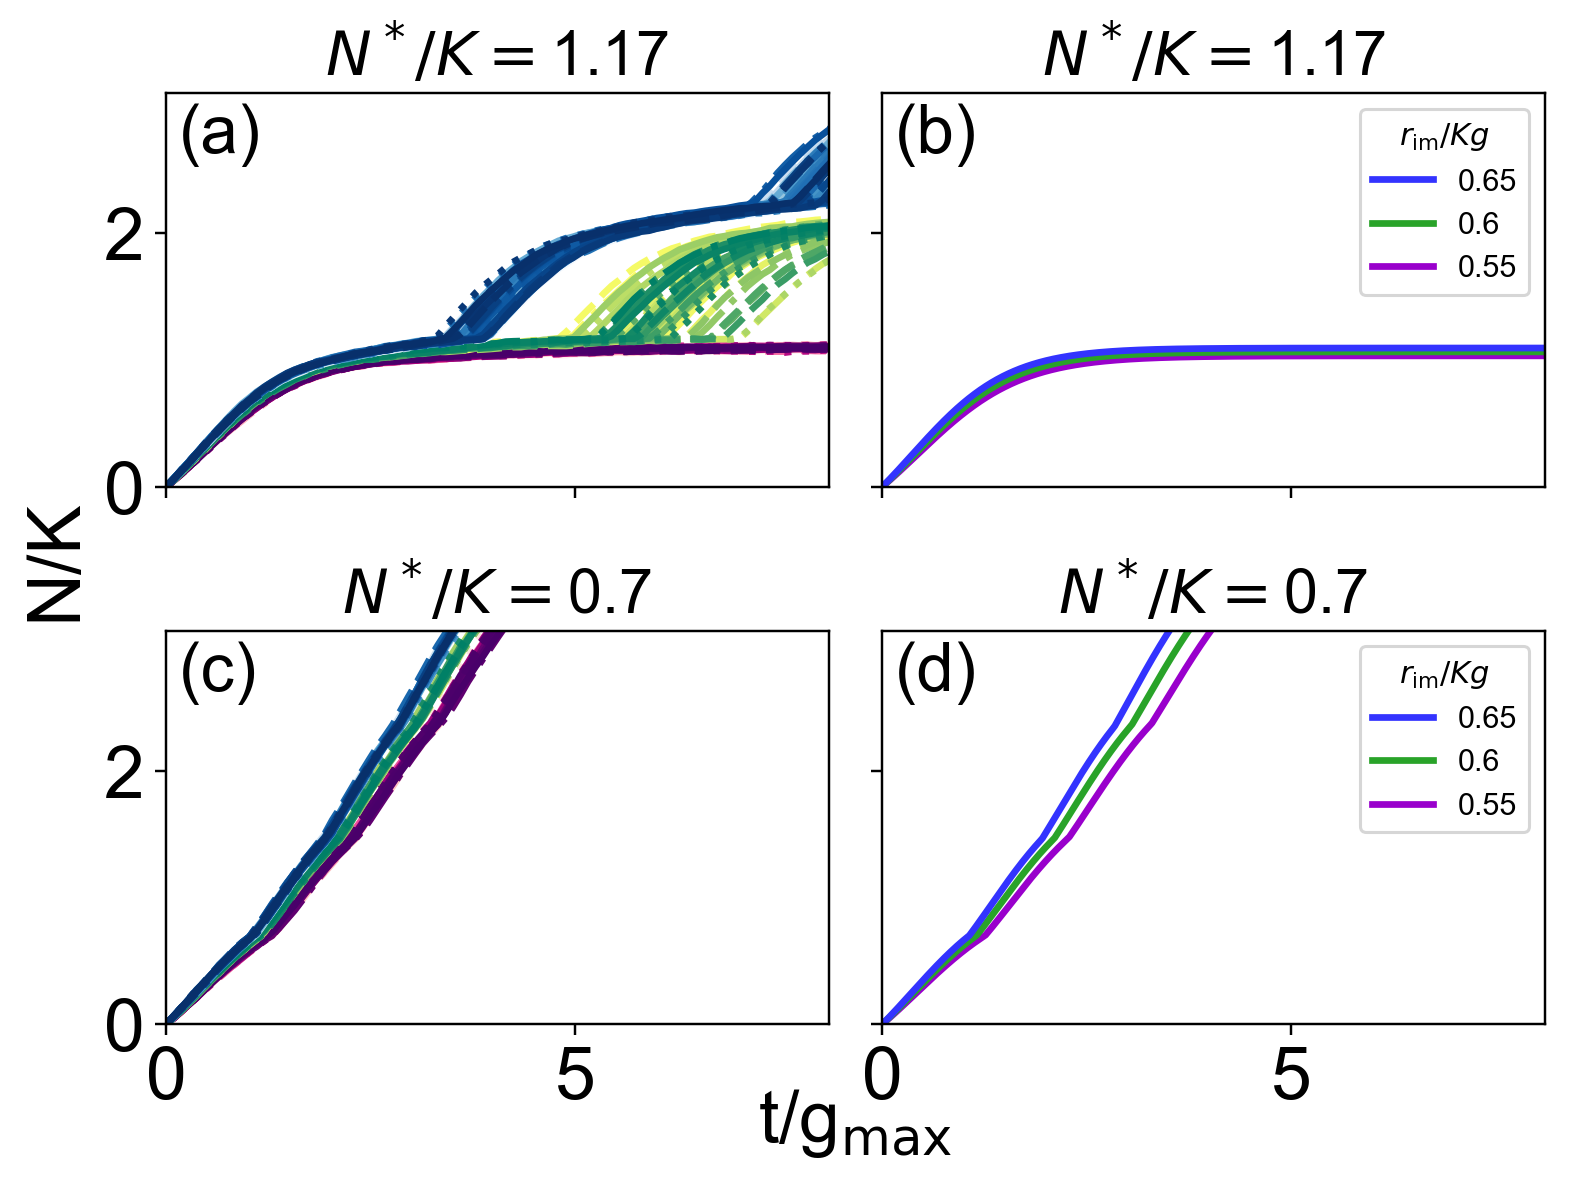

In [16]:
compareNThresh(r_imm_v2, fig4c_pops_v2, fig4d_pops_v2, fig4c_pops_deterministic_v2, fig4d_pops_deterministic_v2)